In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_data = pd.read_excel(r"c:\Users\ylank\OneDrive\Documents\D.S Projects\Train\Data_Train.xlsx")

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

data = train_data.copy()

In [12]:
#it must be TIMESTAMP
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [13]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [14]:
for feature in ['Dep_Time','Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

In [15]:
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data['Journey_Year'] = data['Date_of_Journey'].dt.year

In [16]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

extract_hour_min(data , "Dep_Time")
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-04 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-04 05:50:00,2025-01-04 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-01-04 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [17]:
#drop Dep_Time & Arrival_Time
cols_to_drop = ['Arrival_Time', 'Dep_Time']

data.drop(cols_to_drop,axis=1, inplace=True)

In [18]:
#Dep_Time_hour will give what time of day will have most take-off
def flight_dep_time(x):

    if (x>4) and (x<=8): 
        return "Early Morning"
    elif (x>8) and (x<=12): 
        return "Morning"
    elif (x>12) and (x<=16): 
        return "Afternoon"
    elif (x>16) and (x<=20): 
        return "Evening"
    elif (x>20) and (x<=24): 
        return "Night"
    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

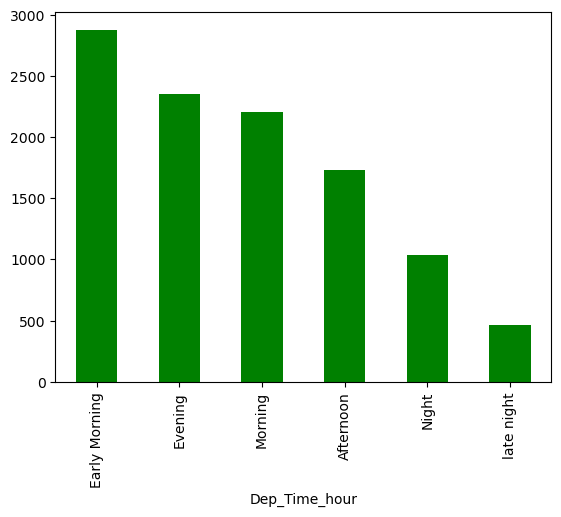

In [19]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar',color='green')

In [20]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'

    return x

In [21]:
data['Duration'] = data ['Duration'].apply(preprocess_duration)

In [22]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [23]:
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

data['Duration_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [24]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [30]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [33]:
data['Duration_total_mins'] = data['Duration'].str.replace('h', "*60").str.replace(' ', '+').str.replace('m', "*1").apply(eval)

In [34]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


Analyze whether Duration impacts on Price or not
    1. Scatter
    2. Regression

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

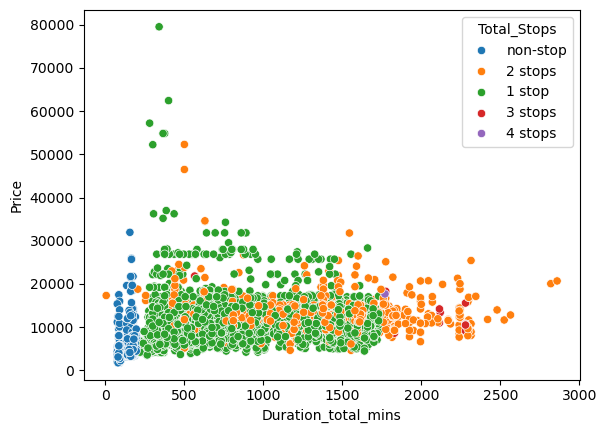

In [36]:
sns.scatterplot(x="Duration_total_mins", y = "Price", data=data, hue= "Total_Stops")

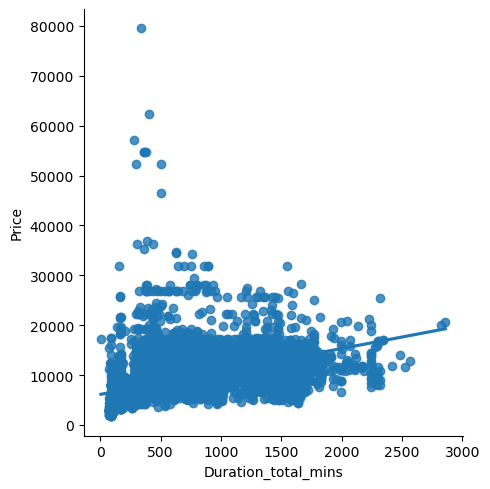

In [38]:
sns.lmplot(x="Duration_total_mins", y = "Price", data=data)

1. On which route is Jet Airways mostly used?
2. Airline vs Price Analysis

1. 

In [39]:
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [49]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

#CCU to BOM to BLR is the route that Jet Airways is mostly used

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

2. For each airline, what is the min, 25th percentile, median, mean, 75th percentile, and max (BOX PLOT)

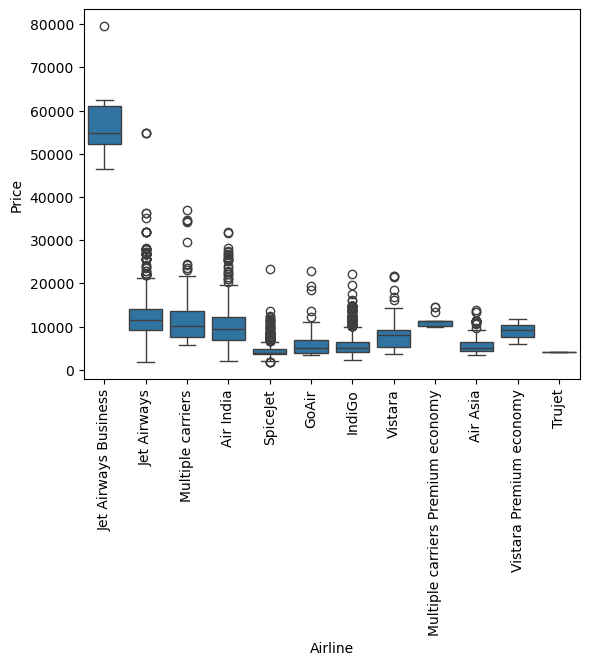

In [56]:
sns.boxplot(y='Price', x='Airline',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation="vertical")
plt.show()

Apply "one-hot" on data

In [57]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140


In [58]:
#Some features of string categories

One-hot: '1' and '0' everywhere else (mostly used for Nominal data)

In [59]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

In [62]:
cat_col = [col for col in data.columns if data[col].dtype == "object"]

In [63]:
num_col = [col for col in data.columns if data[col].dtype != "object"]

In [64]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [66]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [67]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [68]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x== sub_category else 0)

In [69]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


1. Perform target guided encoding on data
2. Perform Manual encoding on data
3. Remove Un-necessary features

1. Target-guided Encoding

In [71]:
data['Airline'].nunique()

12

In [75]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [78]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [79]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [80]:
dict_airlines = {key:index for index , key in enumerate(airlines, 0)}

In [81]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [87]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [88]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [89]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [90]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [93]:
data['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [94]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [95]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [96]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [97]:
dict_dest = {key:index for index , key in enumerate(dest, 0)}

In [98]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [100]:
data['Destination'] = data['Destination'].map(dict_dest)

In [101]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


2. Manual Encoding

In [102]:
data.dtypes

Airline                         int64
Date_of_Journey        datetime64[ns]
Source                         object
Destination                     int64
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_Day                     int32
Journey_Month                   int32
Journey_Year                    int32
Dep_Time_hour                   int32
Dep_Time_minute                 int32
Arrival_Time_hour               int32
Arrival_Time_minute             int32
Duration_hours                  int64
Duration_mins                   int64
Duration_total_mins             int64
Source_Banglore                 int64
Source_Kolkata                  int64
Source_Delhi                    int64
Source_Chennai                  int64
Source_Mumbai                   int64
dtype: object

In [105]:
data['Total_Stops'].unique()

#Ordinal Data --> Label Encoding(sklearn package)

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [107]:
#Label Encoding from SCRATCH
    #use concept of dictionary (key:value)

stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [109]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [110]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


3. Remove unnecessary features

In [111]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [117]:
data['Additional_Info'].value_counts()/len(data)

#78% of data has No Info

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: count, dtype: float64

In [118]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0


In [119]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [120]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source'])

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,2019,22,20,1,10,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,2019,5,50,13,15,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,2019,9,25,4,25,19,0,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,2019,18,5,23,30,5,25,0,1,0,0,0
4,3,2,BLR → NAG → DEL,4h 45m,1,13302,1,3,2019,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,CCU → BLR,2h 30m,0,4107,9,4,2019,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,CCU → BLR,2h 35m,0,4145,27,4,2019,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,BLR → DEL,3h 0m,0,7229,27,4,2019,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,BLR → DEL,2h 40m,0,12648,1,3,2019,11,30,14,10,2,40,1,0,0,0,0


In [122]:
data['Journey_Year'].unique()

array([2019])

In [123]:
data.drop(columns=['Journey_Year'],axis=1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,2019-04-09,Kolkata,3,CCU → BLR,2h 30m,0,No info,4107,9,...,22,25,2,30,150,0,1,0,0,0
10679,7,2019-04-27,Kolkata,3,CCU → BLR,2h 35m,0,No info,4145,27,...,23,20,2,35,155,0,1,0,0,0
10680,10,2019-04-27,Banglore,2,BLR → DEL,3h 0m,0,No info,7229,27,...,11,20,3,0,180,1,0,0,0,0
10681,5,2019-03-01,Banglore,2,BLR → DEL,2h 40m,0,No info,12648,1,...,14,10,2,40,160,1,0,0,0,0


In [124]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_Year'],axis=1,inplace=True)

In [125]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [126]:
data.drop(columns=['Route'],axis=1,inplace=True)

In [127]:
data.head(2)

,Airline,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [128]:
data.drop(columns=['Duration'],axis=1,inplace=True)

In [129]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


1. Perform Outlier Detection
2. How to deal with Outlier

1. Data Visualization to detect outliers

In [135]:
def plot(df, col):
    fig , (ax1, ax2, ax3) = plt.subplots(3,1)

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3, kde=False)

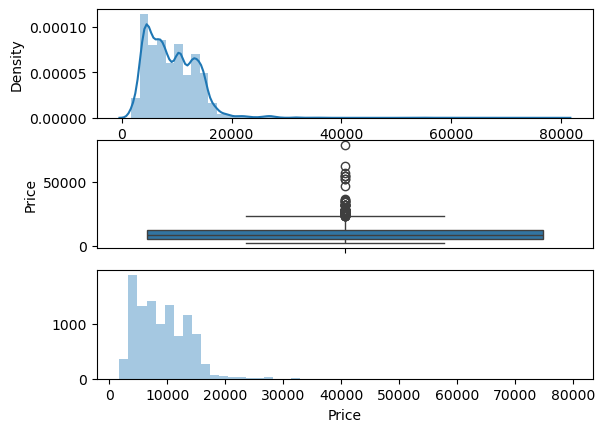

In [136]:
plot(data, 'Price')

2. How to deal with Outliers

In [ ]:

#state maximum and minimum 
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1 
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr


In [140]:
print(maximum)
print(minimum)

23017.0
-5367.0


In [143]:
#Find all outliers
print([price for price in data['Price'] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [144]:
len([price for price in data['Price'] if price > maximum or price < minimum])

#we have 94 outliers

94

In [147]:
#Replace outliers with median

data['Price'] = np.where(data['Price']>=35000, data['Price'].median() , data['Price'])

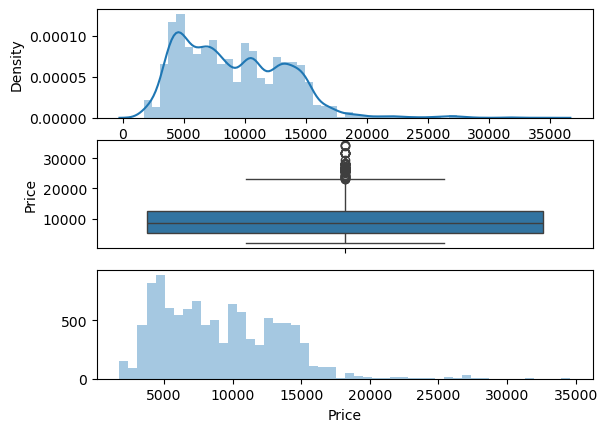

In [148]:
plot(data, 'Price')

1. Perform feature Selection

In [151]:
X = data.drop(['Price'], axis=1)

In [149]:
#Independent features (Route, Dest, Source, Airline)
#Depedent features/ Target (Price)

y = data['Price']

In [161]:
from sklearn.feature_selection import mutual_info_regression

In [162]:
imp = mutual_info_regression(X, y)

In [163]:
imp

array([1.31570668, 1.06320892, 0.7839309 , 0.38261797, 0.6270923 ,
       0.92529869, 0.76729095, 1.14239473, 0.89244899, 1.11669126,
       0.68215879, 0.39937216, 0.44887152, 0.52429201, 0.134192  ,
       0.19565598])

In [170]:
imp_df = pd.DataFrame(imp, index=X.columns)
imp_df

,0
Airline,1.315707
Destination,1.063209
Total_Stops,0.783931
Journey_Day,0.382618
Journey_Month,0.627092
Dep_Time_hour,0.925299
Dep_Time_minute,0.767291
Arrival_Time_hour,1.142395
Arrival_Time_minute,0.892449
Duration_hours,1.116691


In [165]:
imp_df.columns = ['Importance']

In [166]:
imp_df

,Importance
Airline,1.315707
Destination,1.063209
Total_Stops,0.783931
Journey_Day,0.382618
Journey_Month,0.627092
Dep_Time_hour,0.925299
Dep_Time_minute,0.767291
Arrival_Time_hour,1.142395
Arrival_Time_minute,0.892449
Duration_hours,1.116691


In [169]:
imp_df.sort_values(by='Importance',ascending=False)

,Importance
Airline,1.315707
Arrival_Time_hour,1.142395
Duration_hours,1.116691
Destination,1.063209
Dep_Time_hour,0.925299
Arrival_Time_minute,0.892449
Total_Stops,0.783931
Dep_Time_minute,0.767291
Duration_mins,0.682159
Journey_Month,0.627092


Model Building: 
1. Build Model
2. Save Model

1. Training and Testing Data

In [171]:
#Training: learn some kind of relationship within the data, 75% of data

In [172]:
#Testing: Predictions and performance, 25% of data

In [173]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [178]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
ml_model = RandomForestRegressor()

In [180]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [181]:
y_pred = ml_model.predict(X_test)

In [182]:
#Errors

y_pred

array([16786.32,  5517.89,  8774.59, ...,  3594.47,  6277.81,  6874.83])

In [183]:
from sklearn import metrics 

In [184]:
#Determins how accurate our model is building
metrics.r2_score(y_test,y_pred)

0.8114739368310715

2. Save Model

In [186]:
#Model Dumping
import pickle

In [189]:
file = open(r'c:\Users\ylank\OneDrive\Documents\D.S Projects\Train/rf_random.pkl' , 'wb')

In [190]:
pickle.dump(ml_model, file)

In [194]:
#Open

model = open(r'c:\Users\ylank\OneDrive\Documents\D.S Projects\Train/rf_random.pkl' , 'rb')

In [195]:
forest = pickle.load(model)

In [ ]:
y_pred2 = forest.predict(X_test)

In [198]:
metrics.r2_score(y_test,y_pred2)

0.8114739368310715

1. How to define your Evaluation metric
2. How to automate machine learning pipeline

In [204]:
def mape(y_true, y_pred):
    y_true , y_pred = np.array(y_true), np.array(y_pred)
    np.mean(np.abs((y_true - y_pred) /y_true))*100

In [205]:
mape(y_test, y_pred)

In [208]:
from sklearn import metrics

In [211]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training Score: {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('Predicitions are: {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE: {}'.format(mape(y_test, y_prediction)))

    sns.distplot(y_test - y_prediction)


In [213]:
from sklearn.tree import DecisionTreeRegressor

Training Score: 0.966591628243878
Predicitions are: [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2_score: 0.673911469608329
MAE: 1423.0165106701609
MSE: 6348160.9651535
RMSE: 2519.5557078884963
MAPE: None


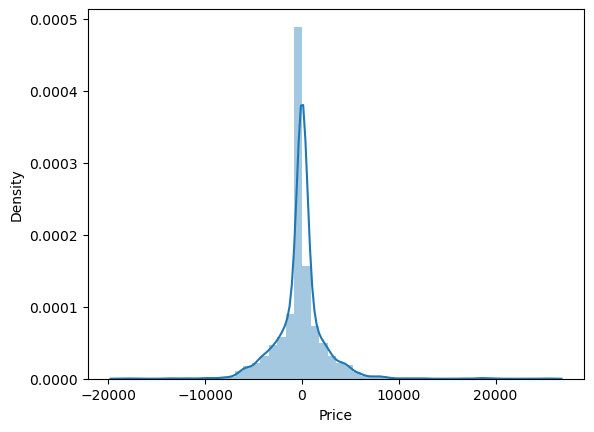

In [214]:
predict(DecisionTreeRegressor())

Training Score: 0.9513010630992466
Predicitions are: [16863.52  5219.57  8850.54 ...  3500.58  6132.38  6821.61]


r2_score: 0.8115482123488464
MAE: 1175.163917997837
MSE: 3668703.95822731
RMSE: 1915.3861120482495
MAPE: None


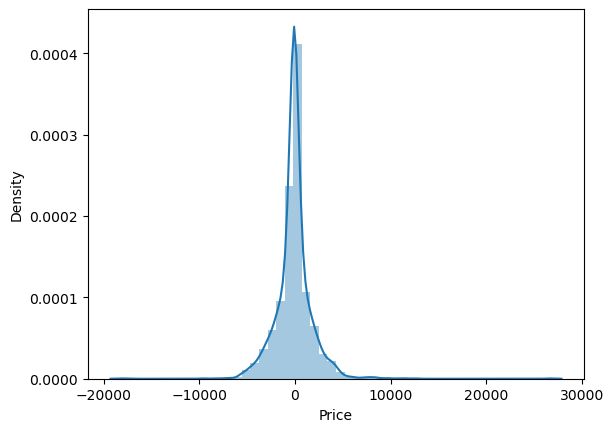

In [215]:
predict(RandomForestRegressor())

1. How to hypertune ML model

In [ ]:
RandomForestRegressor()

In [216]:
from sklearn.model_selection import RandomizedSearchCV

In [217]:
reg_rf = RandomForestRegressor()

In [218]:
np.linspace(start = 100, stop = 1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [219]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num=6)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num=4)]
min_samples_split = [5,10,15,100]

In [220]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [221]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [223]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)

In [224]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [225]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 15,
 'max_features': 'sqrt',
 'max_depth': 30}

In [226]:
rf_random.best_estimator_

#best score

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=15,
                      n_estimators=540)

In [227]:
rf_random.best_score_

0.7973717275931311